# Breweries and Brew Pubs in the USA

### Project Description

**Group Members:** Odysseas Aslanidis, Prasanth Vattikonda, Nicola Petruzzeli, Paul Diaz

This is a list of over 7,000 breweries and brewpubs in the USA provided by Datafiniti's Business Database. 
The dataset includes the category, name, address, city, state, and more for each listing. This however is a sample of a large dataset. The full dataset can be purchased through [Datafiniti](https://datafiniti.co/).

**Kaggle Project:**
https://www.kaggle.com/datafiniti/breweries-brew-pubs-in-the-usa

**What we can do**

According to the Kaggle Project we can use this geographical and categorical information for business locations to determine which cities and states have the most breweries. E.g.:

- Top 10 Cities with breweries or brew pubs.
- Top 10 States with breweries or brew pubs.
- What is the City with the most breweries or brew pubs?
- What is the State with the most breweries or brew pubs?
- Top 10 States with the most breweries or brew pubs per capita?

**Files:** 
- 7160_1.csv.zip
- 8260_1.csv.zip

### Install necessary libraries
The following libraries are needed to run this project.

- **geopandas** - Will be used to plot on the US map the Breweries and Bre Pubs data. The library can be found [here](https://pypi.org/project/geopandas/).
- **requests** - Will be used to make a GET request to fetch the raw HTML content. The library can be found [here](https://pypi.org/project/requests/).
- **beutifulsoup4** - Will be used to scrap the population data from the web. The library can be found [here](https://pypi.org/project/beautifulsoup4/).



In [116]:
#!pip install geopandas 
#!pip install requests 
#!pip install beautifulsoup4 

### Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from subprocess import check_output

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from bs4 import BeautifulSoup
import requests

# Import warnings library to hide unnecessary warnings
import warnings

In [ ]:
warnings.filterwarnings("ignore")

### Import Data

The project provides 2 csv files with Breweries and Brew pubs.
We will merged the files in one single file which will
contain all data that will be used in our project.

In [3]:
df1 = pd.read_csv('7160_1.csv.zip', delimiter=',')
df2 = pd.read_csv('8260_1.csv.zip', delimiter=',')

nRow, nCol = df1.shape
print('There are {0} rows and {1} columns in this data set'.format(nRow,nCol))
nRow, nCol = df2.shape
print('There are {0} rows and {1} columns in this data set'.format(nRow,nCol))

There are 7375 rows and 12 columns in this data set
There are 17823 rows and 15 columns in this data set


### Data Exploration

Observations from the Dataset: 
    
We tried to explore the dataset on perspective of different kinds of feature and corresponding values 
- Unsupervised problem having no definite target variable
- This actual give us a thought , what kind of analysis that we need to do 
- Figured out the longitudnal and latitudnal values are key input variables
- Figures out the unncessory features which won't any value for analysis

In [4]:
df1.info()
df1.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7375 non-null   object 
 1   categories  7375 non-null   object 
 2   city        7375 non-null   object 
 3   country     7375 non-null   object 
 4   key         7375 non-null   object 
 5   lat         5414 non-null   float64
 6   long        5416 non-null   float64
 7   name        7375 non-null   object 
 8   phones      6159 non-null   object 
 9   postalCode  7272 non-null   object 
 10  province    7375 non-null   object 
 11  websites    3548 non-null   object 
dtypes: float64(2), object(10)
memory usage: 691.5+ KB


,address,categories,city,country,key,lat,long,name,phones,postalCode,province,websites
0,407 Radam Ln,brewery,Austin,US,us/tx/austin/407radamln,NaN,NaN,(512) Brewing Co,5127072337,78745,TX,NaN


In [5]:
df2.info()
df2.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17823 entries, 0 to 17822
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          17823 non-null  object 
 1   address     17823 non-null  object 
 2   categories  17823 non-null  object 
 3   city        17823 non-null  object 
 4   country     17823 non-null  object 
 5   hours       8015 non-null   object 
 6   keys        17823 non-null  object 
 7   latitude    12324 non-null  float64
 8   longitude   12324 non-null  float64
 9   menus       1479 non-null   object 
 10  name        17823 non-null  object 
 11  postalCode  17198 non-null  object 
 12  province    17823 non-null  object 
 13  twitter     3050 non-null   object 
 14  websites    6566 non-null   object 
dtypes: float64(2), object(13)
memory usage: 2.0+ MB


,id,address,categories,city,country,hours,keys,latitude,longitude,menus,name,postalCode,province,twitter,websites
0,AVweN1T_ByjofQCxwSPL,Syr Airport,Brewery,Syracuse,US,NaN,us/ny/syracuse/syrairport/2098450797,NaN,NaN,NaN,Adirondack Pub,NaN,NY,NaN,NaN


#### Merging the Data Sets

Both dataframes have the same datatypes in each column.
- **df1:** Columns address, country, name, phones, postalCode and websites will be dropped from our dataframe as they are not needed.
- **df2:** Columns id, address, country, name, hours, menus, postalCode, twitter and websites will be dropped from our dataframe as they are not needed.

In [6]:
df1 = df1.drop(['address','country','name','phones','postalCode','websites'], axis=1)
print(df1.columns)

df2 = df2.drop(['id','address','country','hours','name','postalCode','menus','twitter','websites'], axis=1)
print(df2.columns)

Index(['categories', 'city', 'key', 'lat', 'long', 'province'], dtype='object')
Index(['categories', 'city', 'keys', 'latitude', 'longitude', 'province'], dtype='object')


In [7]:
# Rename the columns to match before append the second dataframe to the first one.
df1 = df1.rename({"lat":"latitude",
                  "long":"longitude",
                  "province":"state"}, axis=1)
df2 = df2.rename({"keys":"key",
                  "province":"state"}, axis=1)

#Print the columns to compare the names
print(df1.columns)
print(df2.columns)

Index(['categories', 'city', 'key', 'latitude', 'longitude', 'state'], dtype='object')
Index(['categories', 'city', 'key', 'latitude', 'longitude', 'state'], dtype='object')


In [8]:
# We will now append the second data frame to the first one.
df = df1.append(df2)

# Finally we will check the shape of the merged dataframe.
nRow_df, nCol_df = df.shape
print('There are {0} rows and {1} columns in this data set'.format(nRow_df, nCol_df))

There are 25198 rows and 6 columns in this data set


### Data Cleaning and Transformation

Now that we merged the two dataframes we will drop the duplicates to make sure our data contain unique values.
We will use the drop_duplicates on the pandas dataframe.

In [9]:
df.drop_duplicates(subset = ["latitude", "longitude"], keep = 'first', inplace = True) 

# We will check if the duplicates where removed:
df.duplicated(subset = ["latitude", "longitude"], keep = False) 
#df[['latitude', 'longitude', 'key']].groupby(['latitude', 'longitude'], as_index=True).count().sort_values(by=['key'], ascending=False)

0        False
2        False
3        False
10       False
11       False
         ...  
17817    False
17818    False
17819    False
17820    False
17822    False
Length: 14690, dtype: bool

In [10]:
nRow_df, nCol_df = df.shape
print('There are {0} unique rows and {1} columns in this data set'.format(nRow_df, nCol_df))

There are 14690 unique rows and 6 columns in this data set


#### Check for missing data

We will check the cleaned data frame for missing values.
If the data frame has missing values a list of missing values in each column will be printed.

In [11]:
if df.isnull().values.any() == False:
    print("There are no missing values in the Data Frame!")  
else:
    print(df.isnull().sum())

categories    0
city          0
key           0
latitude      3
longitude     1
state         0
dtype: int64


#### Drop rows with nulls

Our data set contains 3 missing values in latitude and 1 in longitude columns.
We will remove the null rows from our data set and check again if the rows where removed.

In [12]:
df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

# Check again for missing values
if df.isnull().values.any() == False:
    print("There are no missing values in the Data Frame!")  
else:
    print(df.isnull().sum())

There are no missing values in the Data Frame!


In [13]:
df[['key','categories','city','state','latitude','longitude']].head(5)

,key,categories,city,state,latitude,longitude
2,us/id/boise/830wbannockst,"brewery, Restaurant, Pub, Brewery, pub, Brewer...",Boise,ID,43.617711,-116.202883
3,us/tx/grapevine/1022texantrl,"Wine Tours & Tastings, Food & Drink, Tours, Br...",Grapevine,TX,32.938385,-97.064340
10,us/mi/jackson/3090shirleydr/289346730,"Bars & Clubs, Breweries, Nightlife, Food & Drink",Jackson,MI,42.286010,-84.431260
11,us/vt/stalbans/41lowernewtonst,Brewers,Stalbans,VT,44.810713,-73.083558
12,us/vt/saintalbans/133nmainst/ste7,"Breweries, Food & Drink",Saint Albans,VT,44.814920,-73.082240


### Outliers Detection

Identifying outliers using box plots for the longitude and latitude columns
Also, we came to know that direct mathematical approach is not a better appoach deal with them.
because they are geomentric coordinates

Outliers detection



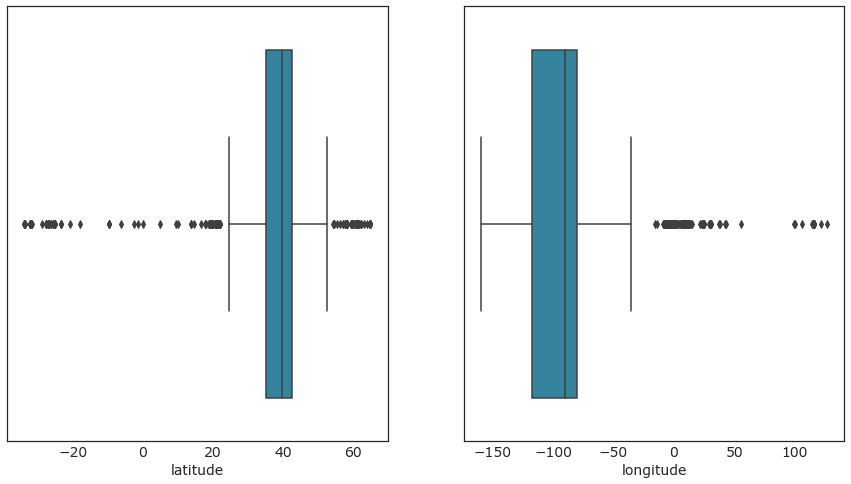

In [114]:
print("Outliers detection\n")
fig, ax = plt.subplots(figsize=(15,8), nrows=1, ncols=2)

i=0
for column in list(['latitude','longitude']):
  sns.boxplot(x = column, data = df, ax=ax[i], palette="PuBuGn_d")
  i +=1

plt.savefig('BoxPlot_outliers.png', dpi=300)
plt.show()

### Plotting the dataset on a Map

Trying to Visualise how the data points are spread across the world.
Here, the data points are located outside the US country. But our problem is particular to United States.

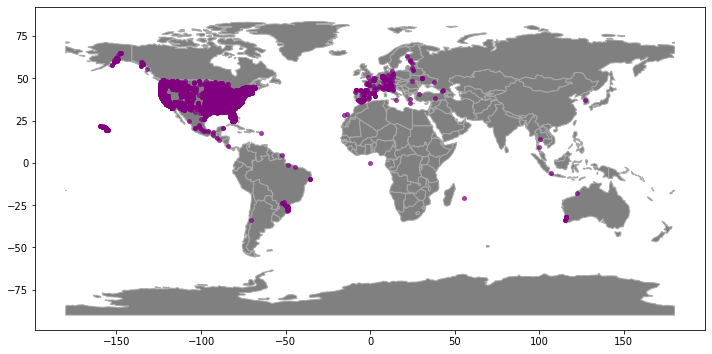

In [15]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(12, 8), color='grey', edgecolor='darkgrey'), marker='o', color='purple', markersize=15, alpha=0.7);

plt.savefig('World_breweries_outliers.png', dpi=300)

### KMeans Algorithm

#### Elbow Method

We will use the elbow method to determine the optimal number of clusters within group sum of square distance and plot the values on a Line Chart.

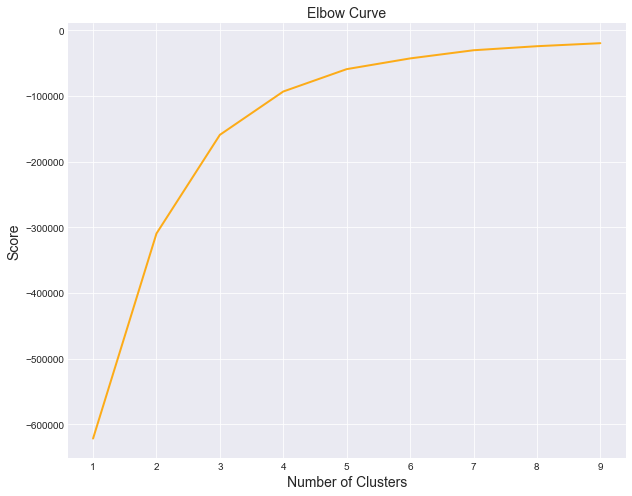

In [17]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# The following code will be used to plot the values on a Line Chart
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-darkgrid')
plt.plot(K_clusters, score, linestyle='solid', color='orange', linewidth=2, alpha=0.9)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Elbow Curve', fontsize=14)
plt.savefig('Elbow_Breweries.png', dpi=300)

plt.show();

#### Building the KMeans Model

In [18]:
X=df.loc[:,['key','latitude','longitude']]

kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(5)

,key,latitude,longitude,cluster_label
2,us/id/boise/830wbannockst,43.617711,-116.202883,1
3,us/tx/grapevine/1022texantrl,32.938385,-97.064340,2
10,us/mi/jackson/3090shirleydr/289346730,42.286010,-84.431260,2
11,us/vt/stalbans/41lowernewtonst,44.810713,-73.083558,2
12,us/vt/saintalbans/133nmainst/ste7,44.814920,-73.082240,2


#### Plotting the K-Means results on a World map

Now that we determined the optimal number of centroids and we clustered our data set into 3 clusters we will plot the clustered data on the world map to check our results. 

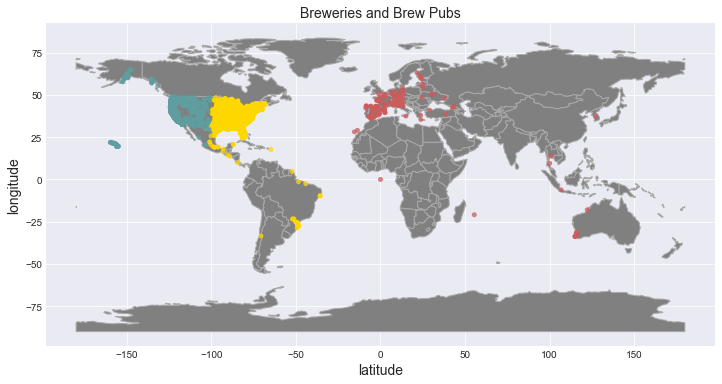

In [19]:
sub_df = X
sub_df["label"] = sub_df["cluster_label"].replace({0:"indianred", 
                                                   1:"cadetblue",
                                                   2:"gold"})

geometry = [Point(xy) for xy in zip(sub_df.longitude, sub_df.latitude)]
gdf = GeoDataFrame(sub_df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(12, 8), color='grey', edgecolor='darkgrey'), c=sub_df["label"], marker='o', markersize=15, alpha=0.7)

plt.xlabel('latitude',fontsize=14)
plt.ylabel('longitude',fontsize=14)
plt.title('Breweries and Brew Pubs',fontsize=14)

plt.savefig('KMeans_Clustering_Breweries.png', dpi=300)

**Comments:** Using K-Means was not the best method to remove the coordinates (outliers) outside the US.

### Removing the coordinates outside the USA

#### Import US States coordinates

In [20]:
usa = gpd.read_file('us_states.shp')

#### Spatial Join

To be able to be able to use and plot the correct data we do the following:
- We need convert them into geometric cordinates because geopandas cannot the accept the lat/long values. 
- We will also convert the dataframe containing our brewery date into a geopandas dataframe to be able to join it later with the US Dataframe. 
- The US dataframe contains multipolygons which are used to identify the US and state boudaries.

In [24]:
points = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

# We will add the crs parameter to recognize units of values as longitudes/latitudes/kms/mts/cms 
geo_df = gpd.GeoDataFrame(df, crs = {'init': 'epsg:4326'}, geometry=geometry)
geo_df.head(2)

,categories,city,key,latitude,longitude,state,geometry
2,"brewery, Restaurant, Pub, Brewery, pub, Brewer...",Boise,us/id/boise/830wbannockst,43.617711,-116.202883,ID,POINT (-116.20288 43.61771)
3,"Wine Tours & Tastings, Food & Drink, Tours, Br...",Grapevine,us/tx/grapevine/1022texantrl,32.938385,-97.064340,TX,POINT (-97.06434 32.93838)


**Comment:** We will use spatial join to remove the wrong coordinates from our data set. Every coordinate which is inside the multipolygon created by the US States multipolygon boundaries will be used in teh final dataset.

In [25]:
joined_df = gpd.sjoin(usa, geo_df, how='inner', op='contains') #exluding the Breweries & Brew Pubs which not available in states
joined_df = joined_df.reset_index(drop=True)
joined_df.head(4)

,drawseq,state_abbr,state_fips,state_name,sub_region,geometry,index_right,categories,city,key,latitude,longitude,state
0,NaN,HI,15,Hawaii,Pacific,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",8215,"Pizza,Italian Restaurants,Bakeries,Restaurants...",Captain Cook,us/hi/captaincook/826127mamalahoahwy/1251864862,19.438604,-155.887470,HI
1,NaN,HI,15,Hawaii,Pacific,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",7063,"wineries, Brewers, Wineries",Volcano,us/hi/volcano/35piimaunadr,19.438889,-155.404464,HI
2,NaN,HI,15,Hawaii,Pacific,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",11852,"Wineries,Places Of Interest,Tourist Informatio...",Volcano,us/hi/volcano/35piimaunadr/551339138,19.444836,-155.283400,HI
3,NaN,HI,15,Hawaii,Pacific,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",290,"Breweries, Beer & Ale Distributors",Keaau,us/hi/keaau/16211wiliamapl,19.637696,-155.044291,HI


### Data Visualization

#### Top 10 cities with most Breweries and Brew Pubs

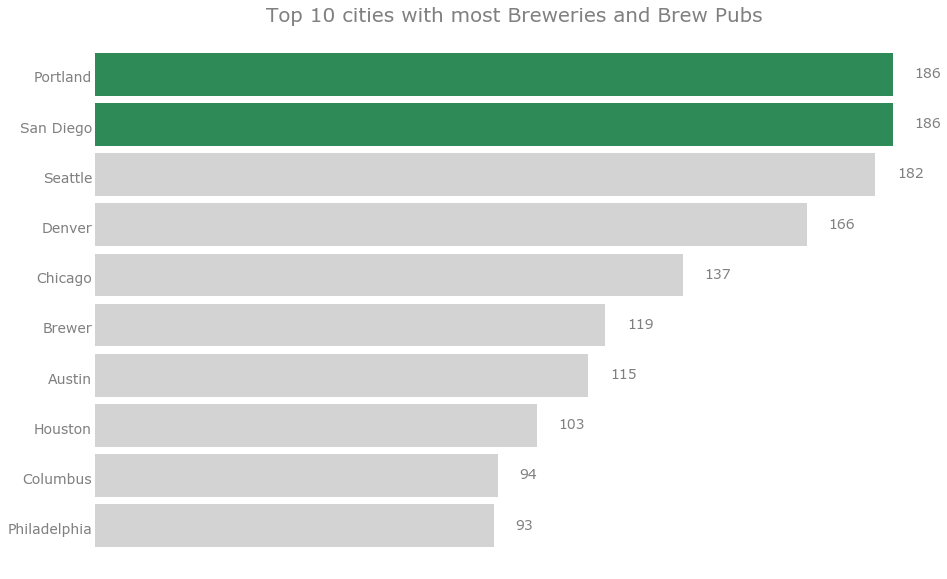

In [42]:
plt.style.use('seaborn-white')

# We will count the values of each city using the below code.
x = joined_df['city'].value_counts()[:10].index
y = joined_df['city'].value_counts()[:10]
index = np.arange(len(y))
width = 0.85

plt.rcParams.update({'figure.figsize': (15,10),
                     'font.size':14,
                     'font.sans-serif':'Verdana'}) #Will use the rcParams to resize the horizontal 
                                                   #bar chart and change the font and font-size.

fig, ax = plt.subplots() 
ax.barh(index, y, width, color=["seagreen",
                                "seagreen",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey"])
ax.set_yticks(index+width/10)
ax.set_yticklabels(x, minor=False)

# The following code removes the borders of the chart
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Invert the axis to display the city with the highest value at the top.
ax.invert_yaxis() 

# Add annotation to each bar
for i in ax.patches:
    ax.text(i.get_width()+5, i.get_y()+0.5, str(round((i.get_width()), 2)),
            color='grey')

plt.setp(ax.get_yticklabels(), verticalalignment='center', color='grey')

# We will use this to hide the x-axis since we have the values next to each bar.
plt.gca().axes.get_xaxis().set_visible(False) 
plt.title('Top 10 cities with most Breweries and Brew Pubs', fontsize=20, color='grey')

plt.savefig('US_breweries_and_brewpubs_in_each_City.png', dpi=300)
plt.show();

#### Top 10 States with most Breweries and Brew Pubs

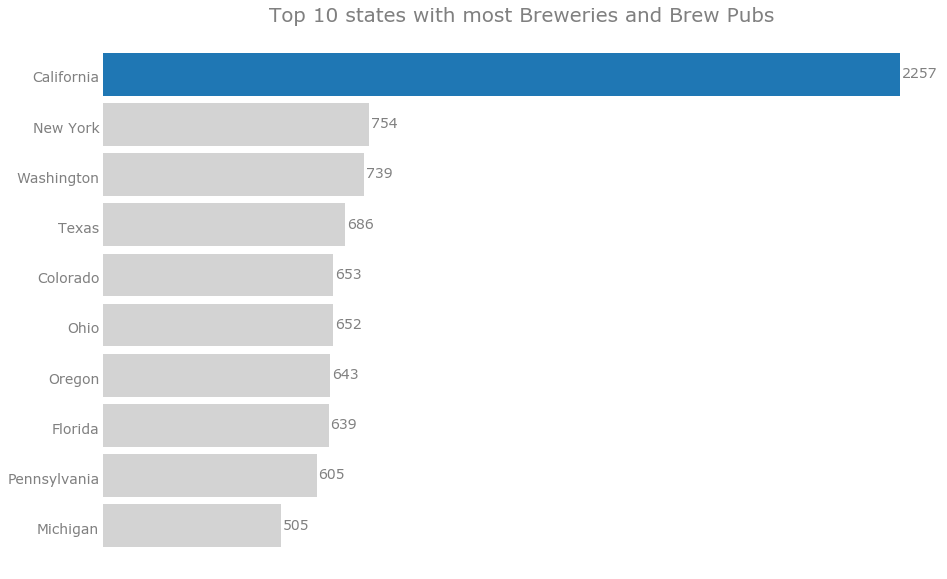

In [31]:
plt.style.use('seaborn-white')

# We will count the values of each state using the below code
x = joined_df['state_name'].value_counts()[:10].index
y = joined_df['state_name'].value_counts()[:10]
index = np.arange(len(y))
width = 0.85

plt.rcParams.update({'figure.figsize': (15,10),
                     'font.size':14,
                     'font.sans-serif':'Verdana'}) #Will use the rcParams to resize the horizontal 
                                                   #bar chart and change the font and font-size.

fig, ax = plt.subplots() 
ax.barh(index, y, width, color=["tab:blue",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey",
                                "lightgrey"])
ax.set_yticks(index+width/10)
ax.set_yticklabels(x, minor=False)

# The following code will be used to remove the borders of the chart
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Invert the axis to display the city with the highest value at the top.
ax.invert_yaxis() 

# Add annotation to each bar
for i in ax.patches:
    ax.text(i.get_width()+5, i.get_y()+0.5, str(round((i.get_width()), 2)),
            color='grey')

plt.setp(ax.get_yticklabels(), verticalalignment='center', color='grey')

# We will use this to hide the x-axis since we have the values next to each bar.
plt.gca().axes.get_xaxis().set_visible(False) 

plt.title('Top 10 states with most Breweries and Brew Pubs', fontsize=20, color='grey')
plt.savefig('US_breweries_and_brewpubs_in_each_State.png', dpi=300)
plt.show();

### Plotting the breweries of each State on a Map

In [62]:
breweries_count = usa.set_index('state_abbr').join(joined_df[['key','state_name']].set_index('state_name').groupby(['state_name']).count())
breweries_count.head(1)

#joined_df.drop(['drawseq','state_fips','sub_region','index_right','categories','key'], axis=1)
#joined_df.head(1)
#joined_df

#usa2 = gpd.read_file('us_states.shp')
brew_pubs = usa.set_index('state_abbr').join(df[['city','key','latitude','longitude','state']].groupby(['state']).count())


,drawseq,state_fips,state_name,sub_region,geometry,key
state_abbr,,,,,,
HI,NaN,15,Hawaii,Pacific,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",NaN


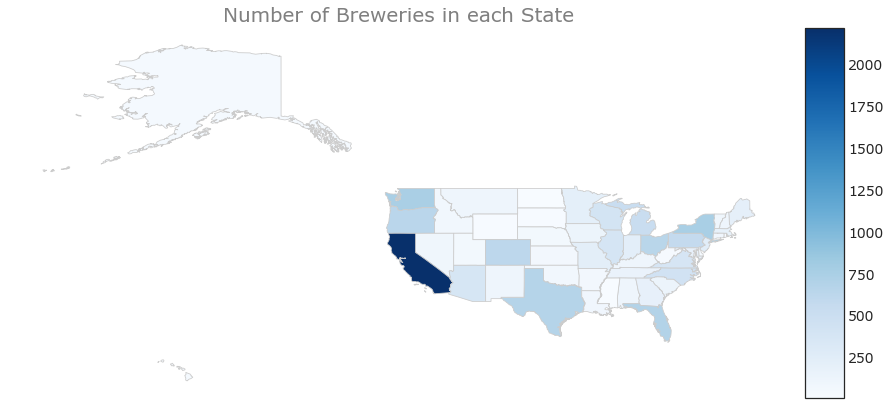

In [107]:
breweries_count = usa.set_index('state_abbr').join(df[['city','key','latitude','longitude','state']].groupby(['state']).count())

vmin, vmax = 120, 220
fig, ax = plt.subplots(figsize=(15, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

breweries_count.plot(ax=ax, 
                column='key', 
                cmap='Blues', 
                linewidth=0.8,
                edgecolor='0.8',
                legend=True,
                cax=cax);
ax.set_title("Number of Breweries in each State", fontdict={'fontsize' : '20',
                                                            'fontweight' : '3',
                                                            'color':'grey'})

# The following code will be used to remove the borders of the chart
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove the axis
ax.set_axis_off()

plt.savefig('US_breweries_in_each_State.png', dpi=300)
plt.show();

__Comment:__ When plotting the number of breweries on the geopandas map it is clear that the state of California has the most breweries than any other state. But is this correct?

### Breweries and Brew Pubs per Capita

In order to have the right picture on what is going on with the Breweries in each state, we have to include the population data in our analysis. This means calculating the Breweries per capita in each State will give us a better understading of how breweries are spread in the US.

#### Import Population data

In order to extract the data from the html page we will use the BeautifulSoup library.

In [46]:
# The website below contains updated data of the population for each state.
url="https://worldpopulationreview.com/states/"

# We will make a GET request to fetch the raw HTML content
html_content = requests.get(url).text
# We will use the below code to parse the html content
soup = BeautifulSoup(html_content, "lxml") 

#### Get headings

The code below goes through the entire html and finds the table tag with class "datatableStyles__StyledTable-bwtkle-1 hOnuWY table table-striped".
Then using the th tag we retrieve all the headers. 

In [54]:
gdp_headers = soup.find("table", attrs={"class": "datatableStyles__StyledTable-bwtkle-1 hOnuWY table table-striped"})
gdp_header_data = gdp_headers.thead.find_all("th") # Finding Header Information in every Header Cell

t_headers = []
for i in range(len(gdp_header_data)):
    for a in gdp_header_data[i].find_all("a"):  #Finding String in the header cells 
      # remove any newlines and extra spaces from left and right
      t_headers.append(a.text.replace('\n', ' ').strip())
print(t_headers)

['Rank', 'State', '2020 Pop.', '2020 Growth', '2018 Pop.', '2010 Census', 'Growth Since 2010', '% of US', 'Density (p/miÂ²)']


#### Get table data

The code below goes through the entire html and finds the table tag with class "datatableStyles__StyledTable-bwtkle-1 hOnuWY table table-striped"
Then using the tr tag we retrieve all the information of the table

In [55]:
gdp_table = soup.find("table", attrs={"class": "datatableStyles__StyledTable-bwtkle-1 hOnuWY table table-striped"})
gdp_table_data = gdp_table.tbody.find_all("tr")  #finding row information in a table 

data = []
for i in range(len(gdp_table_data)):
    for td in gdp_table_data[i].find_all("td"):  # Finding Values in the row 
      # remove any newlines and extra spaces from left and right
      data.append(td.text.replace('\n', ' ').strip())
print(data)

['1', 'California', '39,937,489', '0.96%', '39,557,045', '37,320,903', '7.01%', '11.94%', '256', '2', 'Texas', '29,472,295', '2.68%', '28,701,845', '25,242,679', '16.76%', '8.81%', '113', '3', 'Florida', '21,992,985', '3.26%', '21,299,325', '18,845,785', '16.70%', '6.58%', '410', '4', 'New York', '19,440,469', '-0.52%', '19,542,209', '19,400,080', '0.21%', '5.81%', '413', '5', 'Pennsylvania', '12,820,878', '0.11%', '12,807,060', '12,711,158', '0.86%', '3.83%', '287', '6', 'Illinois', '12,659,682', '-0.64%', '12,741,080', '12,840,762', '-1.41%', '3.79%', '228', '7', 'Ohio', '11,747,694', '0.50%', '11,689,442', '11,539,327', '1.81%', '3.51%', '288', '8', 'Georgia', '10,736,059', '2.06%', '10,519,475', '9,711,810', '10.55%', '3.21%', '187', '9', 'North Carolina', '10,611,862', '2.20%', '10,383,620', '9,574,293', '10.84%', '3.17%', '218', '10', 'Michigan', '10,045,029', '0.49%', '9,995,915', '9,877,535', '1.70%', '3.00%', '178', '11', 'New Jersey', '8,936,574', '0.31%', '8,908,520', '8,799

#### Create the Population dataset with clean data

We will reshape the data so they match the number of columns and number of rows of the original table.
Then we will store them with their headings into a data frame

Only the state name and population numbers are needed. 
- The State to map the Population data with the main data frame.
- The Population data to perform calculations.
Finally we will use the data from '2018 Pop.' column since the breweries data where retrieved in 2018.

In [57]:
df_pop = pd.DataFrame(np.reshape(np.array(data), (len(gdp_table_data), len(gdp_header_data))), columns=t_headers)

df_pop = df_pop[['State', '2018 Pop.']]
df_pop = df_pop.rename({"2018 Pop.": "Population"}, axis=1)

#We will create a for loop to remove the commas from each population value.
for i in range(len(df_pop['Population'])):
    df_pop['Population'][i] = df_pop['Population'][i].replace(',','')

# We will cast the population data as integers in order to perform calculations later.
df_pop['Population'] = df_pop['Population'].astype(int)


In [58]:
# Check the Shape of the dataset to determine if we have the right number of state data
nRow, nCol = df_pop.shape
print('There are {0} rows and {1} columns in this data set'.format(nRow,nCol))

There are 52 rows and 2 columns in this data set


#### Merge data frame with Population Data

Finally we will join the breweries aggregate data with the population data to plot the on the Geopandas map.

In [115]:
breweries_per_cap = breweries_count.set_index('state_name').join(df_pop.set_index('State'))

print("The column population contains:",breweries_per_cap['Population'].isnull().sum(), "null values")

The column population contains: 0 null values


#### Calculate Breweries per Capita 

In [111]:
# Before plotting the data we have to calculate the number of Breweries per Capita.
breweries_per_cap['per_capita'] = breweries_per_cap.key / breweries_per_cap.Population

#### Plot the number of Breweries per Capita

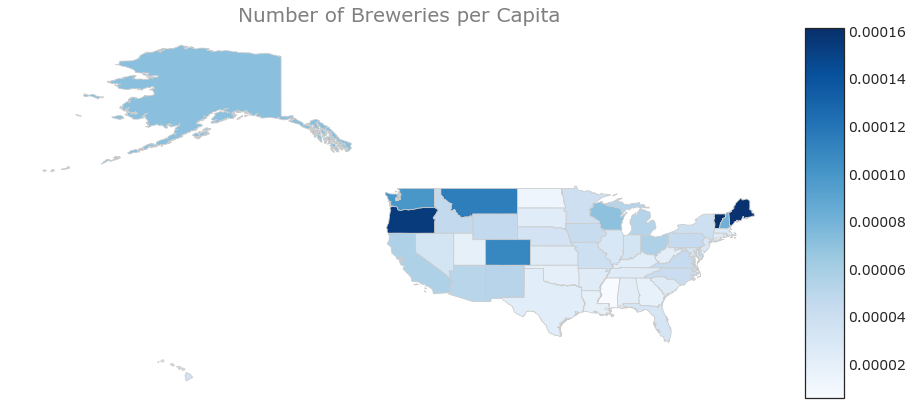

In [112]:
vmin, vmax = 120, 220
fig, ax = plt.subplots(figsize=(15, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

breweries_per_cap.plot(ax=ax, 
            column='per_capita', 
            cmap='Blues', 
            linewidth=0.8,
            edgecolor='0.8',
            legend=True,
            cax=cax);
ax.set_title("Number of Breweries per Capita", fontdict={'fontsize' : '20',
                                                         'fontweight' : '3',
                                                         'color':'grey'})

# Remove the axis
ax.set_axis_off()

plt.savefig('US_breweries_in_each_State_per_Capita.png', dpi=300)
plt.show();

__Conclusion:__ When we calculated the number of breweries per state, initially the state of California was the state with the most breweries. After we included the population data, this display changed. The state of Vermont has the most per capita breweries in the United States.